# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
%pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

<Axes: xlabel='fraud', ylabel='count'>

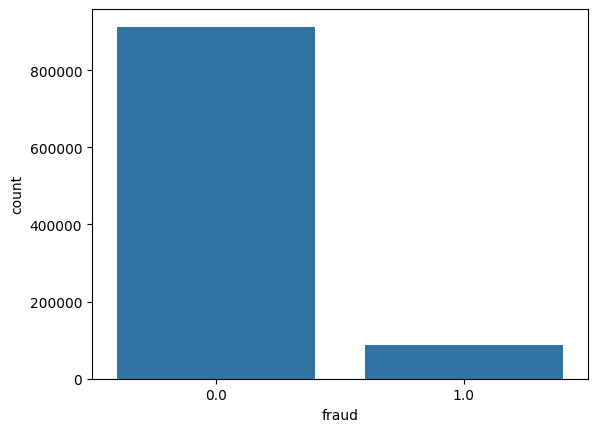

In [6]:
sns.countplot(x="fraud", data=fraud)

yes, the fraud variable is imbalance because there is much more legitimate transactions compared to fraud cases.

In [9]:
target = fraud['fraud']
features = fraud.drop(['fraud'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(features, target, test_size=0.20,random_state=42)

training the model

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/medilin/ironhack/projects/sandbox/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


evaluating the model

In [11]:
log_reg.score(X_test, y_test)

0.958285

In [12]:
log_reg.score(X_train, y_train)

0.95814875

In [13]:
pred = log_reg.predict(X_test)

print("Classification Report:","\n" ,classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.71     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



Oversampling

In [22]:
over_sampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = over_sampler.fit_resample(X_train, y_train)

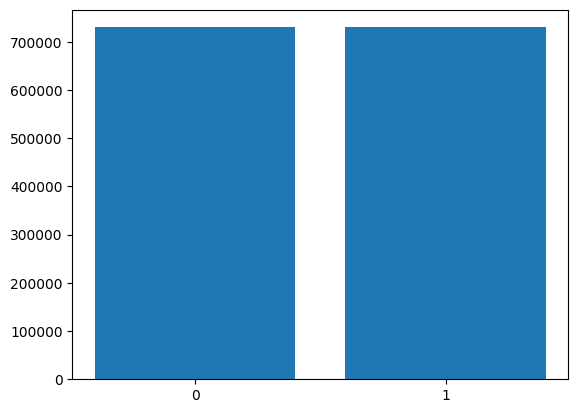

In [23]:
vl = pd.Series(y_resampled).value_counts()
plt.bar(vl.index, vl.values)
plt.xticks([0,1])
plt.show()

In [24]:
log_reg_oversampled = LogisticRegression()
log_reg_oversampled.fit(X_resampled, y_resampled)

/Users/medilin/ironhack/projects/sandbox/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [25]:
pred = log_reg_oversampled.predict(X_test)

print("Classification Report:","\n" ,classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.57      0.95      0.71     17443

    accuracy                           0.93    200000
   macro avg       0.78      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [26]:
under_sampler = RandomUnderSampler()

X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_under, y_train_under)

pred = log_reg_under.predict(X_test)

print("Classification Report:","\n" ,classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



/Users/medilin/ironhack/projects/sandbox/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


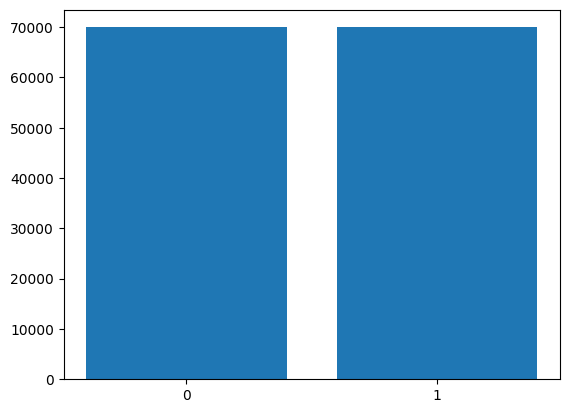

In [21]:
vl = pd.Series(y_train_under).value_counts()

plt.bar(vl.index, vl.values)
plt.xticks([0,1])
plt.show()

In [27]:
#SMOTE (oversampling technique)

smote_sampler = SMOTE()

X_train_smote, y_train_smote = smote_sampler.fit_resample(X_train, y_train)

log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote, y_train_smote)

pred = log_reg_smote.predict(X_test)

print("Classification Report:","\n" ,classification_report(y_test, pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.94      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000



/Users/medilin/ironhack/projects/sandbox/.conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
pred = log_reg_smote.predict_proba(X_test)
pred

array([[8.99245668e-01, 1.00754332e-01],
       [2.29748035e-01, 7.70251965e-01],
       [9.99419158e-01, 5.80842094e-04],
       ...,
       [8.31301356e-04, 9.99168699e-01],
       [9.99655522e-01, 3.44477503e-04],
       [9.99999933e-01, 6.71292582e-08]], shape=(200000, 2))

In [30]:
adjusted_pred = [1 if probs[1]>0.80 else 0 for probs in pred]
print("Classification Report:","\n" ,classification_report(y_test, adjusted_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    182557
         1.0       0.76      0.81      0.78     17443

    accuracy                           0.96    200000
   macro avg       0.87      0.89      0.88    200000
weighted avg       0.96      0.96      0.96    200000

